# Introduction to Deep Learning Basic

This module introduces core ideas of *deep learning*; we will first introduce some basic concept of the nerual network. Then we will dig deeper into the deep learning through some practical uses.

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install tensorflow
!pip install keras
!pip install seaborn

# 1. Neural Network
## 1.1 Architecture
We will start by briefly talk about the neural network, which forms the basis of deep learning. The diagram below shows the representation of a simple neural network.

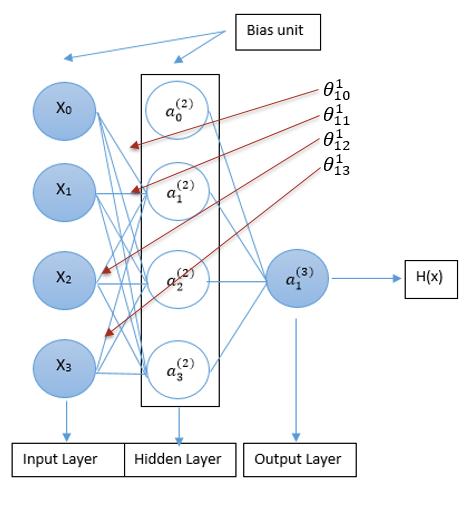

As shown above, the neural network is consist of layers. We always refer the leftmost layer as the input layer; the rightmost layer is the output layer. The layers in the middle are the hidden layers. Between each layer, there are weights which determine the function mapping between layers. Below are the mathmatical representation of the above network; we also called it a **forward pass**:
## 1.2 Forward Pass
$\theta$$^j$: matrix of weights controlling function mapping from layer j to layer j+1

a$_i$$^($$^j$$^)$: 'activation' in unit i layer j

a$_1$$^($$^2$$^)$ = $\theta$$_1$$_0$$^1$X$_0$ + $\theta$$_1$$_1$$^1$X$_1$ + $\theta$$_1$$_2$$^1$X$_2$ + $\theta$$_1$$_3$$^1$X$_3$

a$_2$$^($$^2$$^)$ = $\theta$$_2$$_0$$^1$X$_0$ + $\theta$$_2$$_1$$^1$X$_1$ + $\theta$$_2$$_2$$^1$X$_2$ + $\theta$$_2$$_3$$^1$X$_3$

a$_3$$^($$^2$$^)$ = $\theta$$_3$$_0$$^1$X$_0$ + $\theta$$_3$$_1$$^1$X$_1$ + $\theta$$_3$$_2$$^1$X$_2$ + $\theta$$_3$$_3$$^1$X$_3$

H(x) = a$_3$$^($$^3$$^)$ = $\theta$$_1$$_0$$^2$a$_0$$^($$^2$$^)$ + $\theta$$_1$$_1$$^2$a$_1$$^($$^2$$^)$ + $\theta$$_1$$_2$$^2$a$_2$$^($$^2$$^)$ + $\theta$$_1$$_3$$^2$a$_3$$^($$^2$$^)$

## 1.3 Activation Function
As you could notice, there are activation units in the above representation of network, exactly when we are trying to compute the mapping results on each activation units. Generally, the activation function is any function that takes in a number and return another number. There are several constraint for an activation function:
1. It **must** be continuous.
2. Better if monotonic (does not change direction).
3. Better if nonlinear.
4. Should be computed efficiently.

Examples of activation functions are, *rulu* is used to turn all negative inputs into 0; *sigmoid* function, as you might be familar with that if you have learned logistic regression, takes in an input returns numbers range from 0 to 1. The choose of activation function is based on what you are trying to predict.

After introducing the activation, we will modify the above computation a bit. That's say we are trying to predict yes/no probabilities (sigmoid) from the first layer (input layer in this case) to the second layer. We will have the following.

Let g(x) be the sigmoid function.

a$_1$$^($$^2$$^)$ = g($\theta$$_1$$_0$$^1$X$_0$ + $\theta$$_1$$_1$$^1$X$_1$ + $\theta$$_1$$_2$$^1$X$_2$ + $\theta$$_1$$_3$$^1$X$_3$)

a$_2$$^($$^2$$^)$ = g($\theta$$_2$$_0$$^1$X$_0$ + $\theta$$_2$$_1$$^1$X$_1$ + $\theta$$_2$$_2$$^1$X$_2$ + $\theta$$_2$$_3$$^1$X$_3$)

a$_3$$^($$^2$$^)$ = g($\theta$$_3$$_0$$^1$X$_0$ + $\theta$$_3$$_1$$^1$X$_1$ + $\theta$$_3$$_2$$^1$X$_2$ + $\theta$$_3$$_3$$^1$X$_3$)

After this modification, the result on the activation unit on the second layer will be ranged from 0 to 1.

# 2 Deep Learning
## 2.1 MNIST

Now we will demostrate a 'hello world' example of deep learning, which is the MNIST problem. The problem is to solve 28 x 28 pixel greyscale images of handwritten digits into their 10 categories (0-9). 

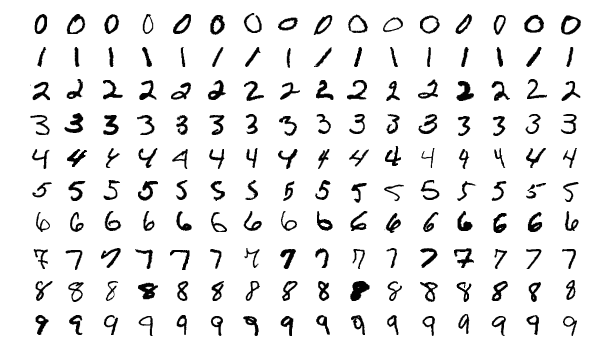

### Import data
Now we will import the MNIST dataset from the keras API. As we could see, our training set contains 60000 training images, with shape 28 x 28. The data representation in this case would be a 3D numpy matrice with shape (60000, 28, 28). We also have test set to test our model, which has 10000 test images.

In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)

print(len(train_labels))

print(train_labels)

print(test_images.shape)

print(len(test_labels))

print(test_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]
(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


The code shows a sample greyscale handwritten image. As you can see it has a dimension of 28 x 28.

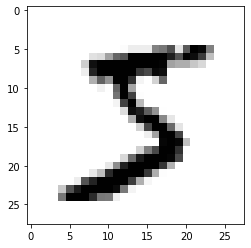

In [3]:
digit = train_images[0]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Create the layer
Now we are entering the core part of neural network, *layer*. The *Sequential* here means a linear stack of layers. The *Dense* here means densely connected (also being referred as fully connected) layer. We set the input array shape to be (None, 28 x 28). The ouput for the second layer is 10-way softmax layer; it will return an array of 10 probability scores.

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))
print(network.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


### Network Compilation
In order to make the network ready for training, we need a loss function, an optimizer, and matrices to monitor training and testing.
* The loss function let the network to measure its performance on the training data.
* The optimizer is the mechanism that the network use to update itself based on the loss function.
* The matrices is to evaluate the model.

The exact meaning of the loss function and the optimizer will be explained in the intermediate difficulty module.

In [5]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

### Data preprocessing
Now, we preprocess the data by reshaping it into the way the network anticipated. Also, we transform the type of the value from uint8 within [0, 225] interval into float32 within [0, 1] interval.

In [6]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We also need to categorically encode the label. One example of this is to represent number 0 with a column matrix with a dimension of 10. Its entry on every index is 0 except index 0, which is 1.

[1, 0, 0, 0, 0, 0, 0, 0, 0]

In [7]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Network Training
Finally, it's the time to train our network. What the fit function will do is shown by following:
1. It will evaluate (predict) the output based on the input image. (Forward pass)
2. Then, it will compute the loss based on the loss function, which is the measurement of the mismatch between the prediction and the actual result.
3. Finally, the network will update its weights using the optimizer based on the loss function.

Here, We run the above step by five times, or **Epochs** referring to number of training take place. Finally, Then we get an accuracy of 98.9 %.

In [8]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 7ms/step - loss: 0.2569 - accuracy: 0.9258
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1030 - accuracy: 0.9691
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0681 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0497 - accuracy: 0.9853
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0373 - accuracy: 0.9885


The test accuracy is about 97.7 %, which is quite different from the training accuracy. This is an example of overfitting.

In [9]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0628 - accuracy: 0.9796
test_acc: 0.9796000123023987


## 2.1 Deep Learning for Computer Vision

When we talk about computer vision, the convnets (or referred as convolutional neural network) will always come to mind since it has been so successful in this field. In the previous section, the accuracy is 97.9 %. Now we are going to improve it by using convnets.

One of the fundamental difference between a densely connected layer (our first method) and convnets is that dense layer observe the global pattern, while the convents focus on local pattern. In our case, it is a 3 x 3 window.

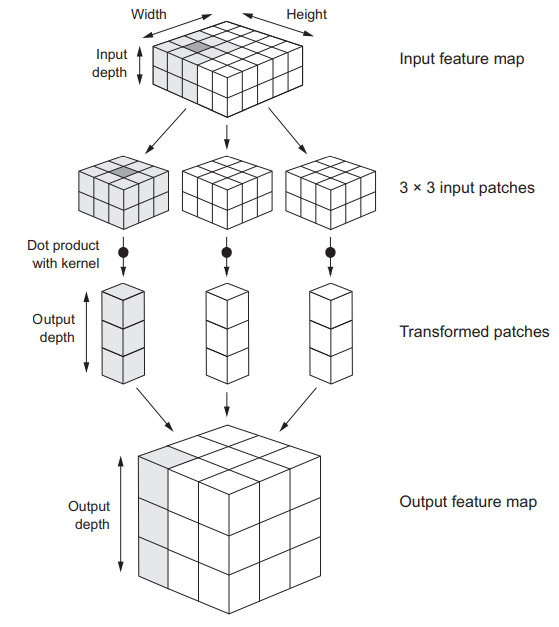

Picture from Deep Learning With Python by FRANÇOIS CHOLLET ©2018 by Manning Publications Co.

### Before Convolution Operation
Essentially, the convnet takes the input tensors of shape (image_height, image_width, image_channels). In this case, our image_channels will be one, since the images we have are monochrome. Hence, the (28, 28, 1) is passed to our first layer.
### During the Convolution Operation
There are two key parameters:
* Size of the patches extracted from the inputs: in this case, it is 3 x 3, which is commonly used. It can also be 5 x 5.
* Depth of the output feature map: the number of filters generated by the computation. We typically choose 32 or 64. **Filter** encode a certain aspect of the input data.

In keras, the parameter is passed in the following form: 
> Conv2D(output_depth, (window_height, window_width))

* Step 1: the (window_height x window_width) shaped window will stop at every possible location on the input. 
* Step 2: Several (window_height x window_width) input patches will be formed. 
* Step 3: Each of the patch will then be transformed into 1D vector of shape (output_depth,) by doing dot product with kernel. 
* Step 4: These 1D vectors will be spatially assembled into a 3D output of shape (height, width, output_depth). 

See the above diagram for a more intuitive understanding.

In [10]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________
None


In our case, the output shape of the convnet layer is (26, 26, 32), where 32 is the output_depth defined in our parameter; there are 26 x 26 transformed patches formed in step 3.

This an example of border effects. There are other things such as padding, strides, which will influence the output size.
### Border Effects
We could notice that the size of output shape keep shrinking as the layer goes deeper. The following in diagrams shows the valid locations of 3 x 3 patches on a 5 x 5 input feature map. There are nine locations, which means the output will become (3, 3, output_depth).

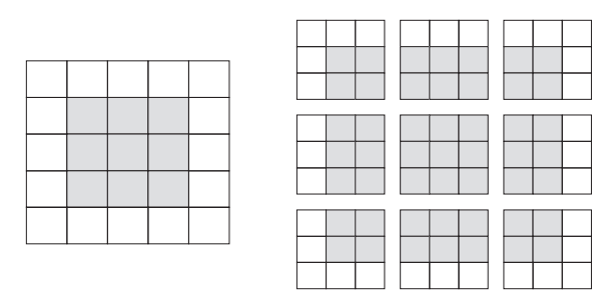

Picture from Deep Learning With Python by FRANÇOIS CHOLLET ©2018 by Manning Publications Co.

### Padding
One way to stop shrinking is padding. Padding is to add appropriate number of rows and columns to each side of the input feature map in order to fit the patch window around every input tile. 

Below diagram shows a simple padding example.

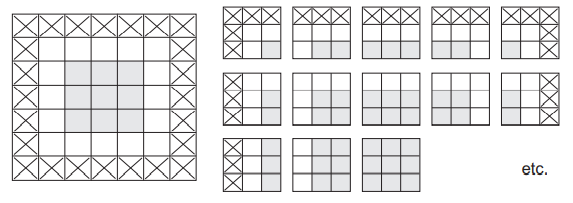

Picture from Deep Learning With Python by FRANÇOIS CHOLLET ©2018 by Manning Publications Co.

After padding, there will be 5 x 5 valid locations of 3 x 3 patches on 5 x 5 input. The output will be (output_depth, 5, 5) after these patches are transformed into 1D vectors, hence it is not shrinking in this case.

### Strides
Strides is another way to affect the size of the output.

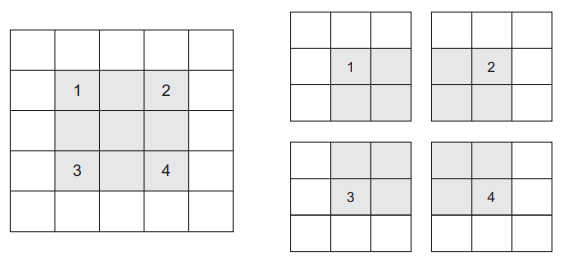

Picture from Deep Learning With Python by FRANÇOIS CHOLLET ©2018 by Manning Publications Co.

Strides refer to the distance between two successive windows. This diagram shows an example of valid locations of 3 x 3 patches with 2 strides from 5 x 5 featured map. Use 2 means downsampling the width and height of the output feature map by factor 2.

Strides is rarely used in real world cases, we typically use max pooling to downsampling the output feature map.

### Max Pooling Operation
The max pooling operation is used for downsampling by outputing the max value of each channel. Generally, it will use 2 x 2 patches with 2 strides and transformed via hardcoded max tensor operation instead using kernel as in step 3.

We could notice from the model summary that the it halves the output feature map. This is similar to the effect of the strides.

Now we will create the dense layered network same as above.

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

Now we only need to copy the same code of data preprocessing and training from the previous basic example.

From the result, we know that the accuracy is 99.4%

In [12]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 29s 30ms/step - loss: 0.1736 - accuracy: 0.9456
Epoch 2/5
938/938 [==============================] - 29s 30ms/step - loss: 0.0480 - accuracy: 0.9852
Epoch 3/5
938/938 [==============================] - 29s 30ms/step - loss: 0.0326 - accuracy: 0.9901
Epoch 4/5
938/938 [==============================] - 28s 30ms/step - loss: 0.0250 - accuracy: 0.9922
Epoch 5/5
938/938 [==============================] - 29s 31ms/step - loss: 0.0198 - accuracy: 0.9941


The test accuracy is 99.1%, which is quite a increase from the basic dense neural network.

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0280 - accuracy: 0.9921


Now, you might have felt the power of convolutional neural network and understand why it has been so successful in the realm of image processing. For a more detailed discussion about convnets, please do see the deep learning with intermediate level.